In [8]:
from runprog import run_strategy
from strategies import SMAStrategy, RSIStrategy, StochStrategy
import datetime as dt
import yfinance as yf

In [9]:
# Download historical data for TSLA
ticker = "TSLA"
start_date = dt.datetime(2010, 10, 1)
end_date = dt.datetime(2024, 1, 1)
data = yf.download(ticker, start=start_date, end=end_date)
initial_cash = 1000000


[*********************100%%**********************]  1 of 1 completed


In [10]:
# Save data to CSV to use with PyAlgoTrade
csv_file = 'STOCK_data.csv'  # Adjust path as needed
data.to_csv(csv_file)

In [11]:
# Parameters for each strategy
fast_ma_period = 50
slow_ma_period = 200
rsi_period = 14
fastKPeriod = 14   
slowDPeriod = 3 

2012-01-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill TSLA order [5] for 887674 share/s
-------------------------------------
SMA STATISTICS
Final portfolio value: $35408573.02
Cumulative returns: 3440.86 %
Sharpe ratio: 0.73
Max. drawdown: 58.43 %
Longest drawdown duration: 1975 days, 0:00:00

Total trades: 10
Avg. profit: $3460715
Profits std. dev.: $9707789
Max. profit: $32242791
Min. profit: $-892676
Avg. return: 141 %
Returns std. dev.: 306 %
Max. return: 941 %
Min. return: -19 %

Profitable trades: 3
Avg. profit: $12618215
Profits std. dev.: $13934843
Max. profit: $32242791
Min. profit: $1248107
Avg. return: 492 %
Returns std. dev.: 370 %
Max. return: 941 %
Min. return: 35 %

Unprofitable trades: 7
Avg. loss: $-463929
Losses std. dev.: $259894
Max. loss: $-892676
Min. loss: $-14417
Avg. return: -10 %
Returns std. dev.:  6 %
Max. return: -1 %
Min. return: -19 %
2013-08-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill TSLA order [61] for 650558 share/

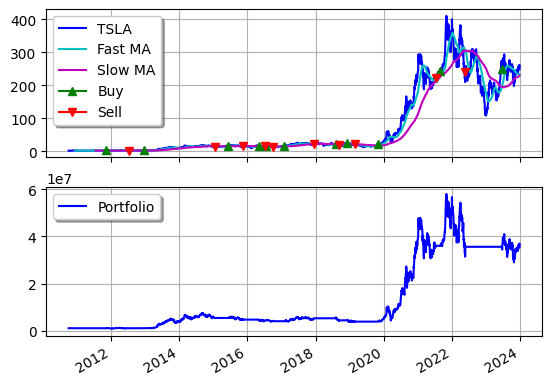

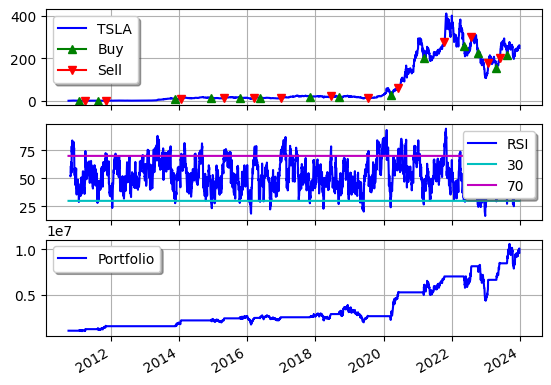

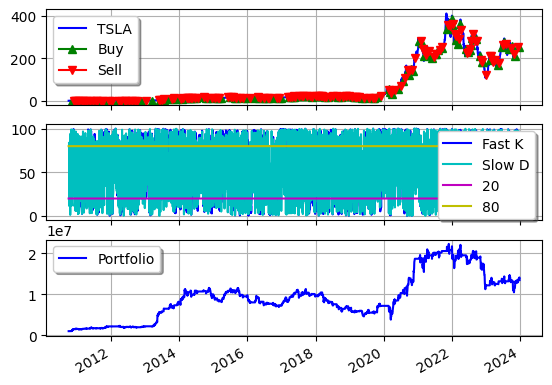

In [12]:
#Run three seperate strategies 
run_strategy(SMAStrategy, csv_file, ticker, initial_cash, fast_ma_period, slow_ma_period, ticker)
run_strategy(RSIStrategy, csv_file, ticker, initial_cash, rsi_period, ticker)
run_strategy(StochStrategy, csv_file, ticker, initial_cash, fastKPeriod, slowDPeriod, ticker)

In [13]:
#Put plots to html files and combine them into one html 
plot_html = f"<h2>SMA Plot</h2><img src='plot.png' style='width:35%;'>"
plot2_html = f"<h2>RSI Plot</h2><img src='plot2.png' style='width:35%;'>"
plot3_html = f"<h2>OS Plot</h2><img src='plot3.png' style='width:35%;'>"
combined_html = f"<br>{plot_html}<br><br>{plot2_html}<br><br>{plot3_html}<br>"
    
# Save the combined HTML to a file
html_filename = 'combined_trade_signals.html'
with open(html_filename, 'w') as f:
    f.write(combined_html)